# Test 54: Kruskall–Wallis rank sum test of K populations (H-test)

## Objective

- I have $K$ random samples (each sample has multiple observations)
- Do the $K$ samples come from $K$ populations with a common mean? 

## Assumptions

- Each sample size should be at least 5 for the $\chi^2$ assumption
- Each of the $K$ distributions should be continuous

## Method

- Combine all $K$ samples, and arrange the big sample in order of increasing size

- Each observation is given a rank 

- Compute the rank sum for each of the $K$ samples. 

- Let $R_j$ be the rank sum of the j-th sample, $n_j$ be the size of the $j$-th sample, and $N$ be the size of the combined sample

- The test statistic is:
$$\begin{aligned}
    H &= \frac{12}{N \cdot (N+1)} \cdot \sum_{j=1}^{K} \frac{R_j^2}{n_j} - 3 \cdot (N+1)
\end{aligned}$$

- The test statistic follows a $\chi^2$ distribution with $K-1$ degrees of freedom

- The null hypothesis is that all samples have equal means, and it is rejected if $H$ exceeds the critical value

## Example

## Proof

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
K = 5
sample_size = 20

def get_test_statistic():
    N = sample_size * K
    samples = np.random.normal(10,5,K * sample_size).reshape(-1,)
    ranks = samples.argsort().argsort().reshape(sample_size, K)
    rank_sums = np.sum(ranks, axis=0)
    assert(len(rank_sums) == K)

    test_statistic = (np.sum((rank_sums**2/sample_size)) * (12/(N * (N+1)))) - (3 * (N+1))
    return test_statistic

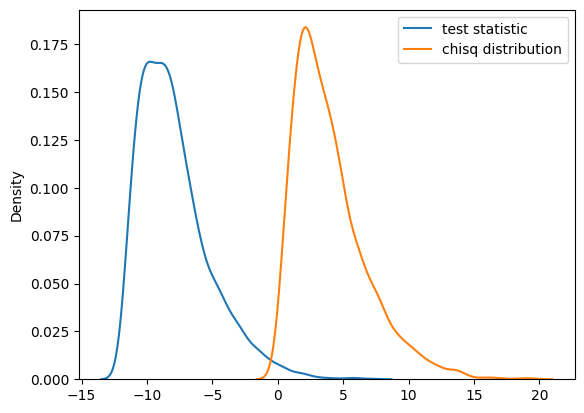

In [42]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(K-1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()